## 한글 폰트 적용

아래 셀 실행 후 런타임 다시시작 아래 셀 다시 실행

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf
!pip install statsmodels==0.12.1

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose            display status information while busy
  -V, --version            display font config version and exit
  -h, --help               di

## 그래픽 카드 확인

그래픽 카드 없으면 런타임 유형 변경 -> GPU

In [2]:
!nvidia-smi

Mon Nov 15 06:55:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 라이브러리 

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import tensorflow as tf
import keras
from numpy import array
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl
from IPython.core.display import display, HTML
from datetime import datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta
from sklearn.preprocessing import MinMaxScaler, RobustScaler
# from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from statsmodels.tsa.seasonal import seasonal_decompose, STL
import urllib.request
import json
import datetime
import os
from datetime import datetime

## 드라이브 마운트

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 2021년 9월 26일 까지 농산물 데이터 전처리 코드

코드 실행시간을 고려하여 실행 결과물인 csv파일을 따로 제출하고, 이를 위해 실행한 전처리 코드는 주석처리

### 2016.1.1 ~ 2020.11.4 농산물 데이터

구글 드라이브에 nongsan_data 폴더 생성 후 train.csv, test_2020-11-05.csv 업로드

In [5]:
# df1 = pd.read_csv('/content/gdrive/MyDrive/nongsan_data/train.csv', encoding='utf-8')
# df1.head()

In [6]:
# df2 = pd.read_csv('/content/gdrive/MyDrive/nongsan_data/test_2020-11-05.csv', encoding='utf-8')
# df2.head()

### 2020.11.6 ~ 2021.9.26 농산물 데이터

nongsan_data 폴더에 AT_TSALET_ALL 폴더 생성

In [7]:
# from datetime import datetime
# from datetime import timedelta

# date='20201105'

# def date_range(start, end):
#     start = datetime.strptime(start, "%Y-%m-%d")
#     end = datetime.strptime(end, "%Y-%m-%d")
#     dates = [(start + timedelta(days=i)).strftime("%Y%m%d") for i in range((end-start).days+1)]
#     return dates
# dates = date_range("2020-11-06", "2021-09-26")

# date_list=dates
# url = 'https://www.nongnet.or.kr/api/whlslDstrQr.do?sdate='+date

# response = urllib.request.urlopen(url).read()
# response = json.loads(response)

# data = pd.DataFrame(response['data'])
# data

In [8]:
# for i in date_list:
#   date=i
#   url = 'https://www.nongnet.or.kr/api/whlslDstrQr.do?sdate='+date # sdate = 날짜
#   response = urllib.request.urlopen(url).read()
#   response = json.loads(response)
#   temp = pd.DataFrame(response['data'])
#   data = pd.concat([data, temp], axis=0)
#   print(i)

In [9]:
# data.to_csv('/content/gdrive/MyDrive/nongsan_data/AT_TSALET_ALL/AT_TSALET_ALL.csv', encoding='utf-8-sig', index=False)

In [10]:
# os.mkdir('./dict')

In [11]:
# from glob import glob
# import multiprocessing
# import pickle

# # 윈도우즈 사용시 함수를 별도의 .py파일로 저장 후 import하여 사용
# def preprocessing(tsalet_file):
#     unique_pum = [
#         '배추', '무', '양파', '건고추','마늘',
#         '대파', '얼갈이배추', '양배추', '깻잎',
#         '시금치', '미나리', '당근',
#         '파프리카', '새송이', '팽이버섯', '토마토',
#     ]
    
#     unique_kind = [
#         '청상추', '백다다기', '애호박', '캠벨얼리', '샤인마스캇'
#     ]
    
#     train_dict = {
#         'date':[]
#     }
    
#     for sub in unique_pum:
#         train_dict[f'{sub}_거래량(kg)'] = []
#         train_dict[f'{sub}_가격(원/kg)'] = []
        
#     for sub in unique_kind:
#         train_dict[f'{sub}_거래량(kg)'] = []
#         train_dict[f'{sub}_가격(원/kg)'] = []
        
#     tsalet_sample = pd.read_csv(tsalet_file)
#     days = sorted(tsalet_sample['SALEDATE'].unique())
#     for day in days:
#         train_dict['date'].append(day)
#         for sub in unique_pum:
#             # 날짜별, 품목별, 거래량이 0 이상인 행만 선택
#             c = tsalet_sample[(tsalet_sample['SALEDATE']==day) & (tsalet_sample['PUM_NM']==sub) & (tsalet_sample['TOT_QTY']>0)]
#             if c.shape[0] == 0:
#                 train_dict[f'{sub}_거래량(kg)'].append(0)
#                 train_dict[f'{sub}_가격(원/kg)'].append(0)
#             else:
#                 tot_amt = c['TOT_AMT'].sum().astype(float)
#                 tot_qty = c['TOT_QTY'].sum().astype(float)
#                 mean_price = tot_amt/(tot_qty+1e-20)
#                 train_dict[f'{sub}_거래량(kg)'].append(tot_qty)
#                 train_dict[f'{sub}_가격(원/kg)'].append(mean_price)
        
#         for sub in unique_kind:
#             # 날짜별, 품종별, 거래량이 0 이상인 행만 선택
#             c = tsalet_sample[(tsalet_sample['SALEDATE']==day) & (tsalet_sample['KIND_NM']==sub) & (tsalet_sample['TOT_QTY']>0)]
#             if c.shape[0] == 0:
#                 train_dict[f'{sub}_거래량(kg)'].append(0)
#                 train_dict[f'{sub}_가격(원/kg)'].append(0)
#             else:
#                 tot_amt = c['TOT_AMT'].sum().astype(float)
#                 tot_qty = c['TOT_QTY'].sum().astype(float)
#                 mean_price = round(tot_amt/(tot_qty+1e-20))
#                 tot_qty = round(tot_qty, 1)
#                 train_dict[f'{sub}_거래량(kg)'].append(tot_qty)
#                 train_dict[f'{sub}_가격(원/kg)'].append(mean_price)
                
#     with open(f'/content/dict/{tsalet_file.split("/")[-1].split(".")[0]}.pkl', 'wb') as f:
#         pickle.dump(train_dict, f)

# tsalet_files = sorted(glob('/content/gdrive/MyDrive/nongsan_data/AT_TSALET_ALL/*'))

# pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
# pool.map(preprocessing, tsalet_files)
# pool.close()
# pool.join()

# dict_files = sorted(glob('/content/dict/*.pkl'))

# train_dict_list = []
# for dict_file in dict_files:
#     with open(dict_file, 'rb') as f:
#         train_dict = pickle.load(f)
#     train_dict_list.append(train_dict)

# train = None

# for train_dcit in train_dict_list:
#     if train is None:
#         train = pd.DataFrame(train_dcit)
#     else:
#         train = pd.concat([train, pd.DataFrame(train_dcit)])

# train['date'] = train.date.astype(str).str.replace('-','')
# train['date'] = pd.to_datetime(train.date, format='%Y%m%d')

# train

In [12]:
# t = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
# df1 = pd.read_csv('/content/gdrive/MyDrive/nongsan_data/train.csv', encoding='utf-8')
# df2 = pd.read_csv('/content/gdrive/MyDrive/nongsan_data/test_2020-11-05.csv', encoding='utf-8')
# df3 = train
# df3['date'] = pd.to_datetime(df3['date'])
# df3 = df3[df3['date'].notnull()].reset_index(drop=True)
# df1 = pd.concat([df1,df2], axis=0)
# df1 = pd.concat([df1, df3], axis=0)
# df1['date'] = pd.to_datetime(df1['date'])
# df1

In [13]:
# df1.to_csv('/content/gdrive/MyDrive/nongsan_data/df1.csv', encoding='utf-8-sig', index=False)

## 2021년 9월 26일 까지의 농산물 거래 데이터

제출한 df1.csv 파일을 구글드라이브의 nongsan_data 폴더에 업로드 후 실행

In [20]:
df1 = pd.read_csv('/content/gdrive/MyDrive/nongsan_data/df1.csv', encoding='utf-8')

In [21]:
df1

,date,요일,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2016-01-01,금요일,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-01-02,토요일,80860.0,329.000000,80272.0,360.000000,122787.5,1281.000000,3.0,11000.000000,15019.0,5475.000000,92334.0,1704.000000,6359.00,1331.000000,40028.0,348.000000,4374.9,13242.000000,16550.5,2339.000000,10528.00,1729.000000,13885.0,804.000000,3853.0,3703.000000,15797.0,2576.000000,14634.0,1474.000000,30950.0,1621.000000,5125.0,9235.0,434.0,2109.0,19159.0,2414.0,880.0,2014.0,0.0,0.0
2,2016-01-03,일요일,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-01-04,월요일,1422742.5,478.000000,1699653.7,382.000000,2315079.0,1235.000000,699.0,4464.000000,141638.0,5210.000000,994328.1,1716.000000,262615.50,1212.000000,1074699.1,345.000000,122613.5,9923.000000,427435.1,2153.000000,82113.50,3960.000000,558950.2,794.000000,104930.3,4871.000000,277326.5,2440.000000,159800.0,1750.000000,291057.0,1834.000000,38525.5,7631.0,500702.0,2046.0,620539.0,2018.0,2703.8,3885.0,0.0,0.0
4,2016-01-05,화요일,1167241.0,442.000000,1423482.3,422.000000,2092960.1,1213.000000,1112.6,4342.000000,126207.8,5387.000000,787716.0,1715.000000,221850.50,1197.000000,825681.9,350.000000,79055.9,9529.000000,334636.8,2220.000000,80144.00,3333.000000,444353.7,763.000000,100699.5,5129.000000,218465.2,2437.000000,153084.0,1822.000000,194626.5,1833.000000,32615.0,6926.0,147638.0,2268.0,231958.0,2178.0,8810.0,2853.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2058,2021-09-22,수요일,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2059,2021-09-23,목요일,20216.0,1464.405125,52127.0,492.965258,14186.0,878.087904,105.0,13497.114286,1339.0,8236.347274,8695.0,2007.694077,1883.00,2204.564525,10226.0,313.834833,1239.0,9839.556094,2216.6,6865.731300,524.00,9203.816794,3252.5,1511.921599,647.0,5881.893354,1286.0,4691.539658,2155.0,3563.980974,10775.0,1840.222738,3538.0,5939.0,2314.0,1460.0,4566.0,2147.0,14383.0,4825.0,9194.0,12065.0
2060,2021-09-24,금요일,2017345.6,803.021436,2384975.3,418.847906,2324538.7,824.078027,2889.0,13224.260990,94263.0,6534.739633,745473.1,1398.309770,466294.76,1771.500304,732886.0,392.375283,156597.5,6712.916100,117784.4,4536.146782,53699.00,10633.700609,402301.0,1128.914315,214169.2,3495.467467,249718.2,3652.905099,132057.0,3841.539971,541273.1,1805.042334,85787.8,4529.0,951911.9,960.0,898381.7,836.0,227488.0,5338.0,462828.8,10151.0
2061,2021-09-25,토요일,1642272.0,704.139482,1861274.3,349.233220,1476640.5,832.179434,1850.0,13468.664324,57356.9,6488.914481,732695.9,1231.489623,521976.29,965.280770,747339.8,358.134404,128319.1,5539.059283,98043.0,3677.718287,55237.65,9826.284174,282786.0,958.202291,242768.0,2489.977843,212638.2,3274.698408,142016.0,3420.287608,513011.0,1799.876630,67583.0,3146.0,620348.3,947.0,622795.6,623.0,243256.0,5117.0,441083

## 제출일 기준 어제의 농산물 거래 데이터를 받아오는 코드

구글드라이브의 nongsan_data 폴더에 TODAY 폴더 생성 후 실행

In [22]:
# date : 어제 날짜로
date='20210927'
url = 'https://www.nongnet.or.kr/api/whlslDstrQr.do?sdate='+date

response = urllib.request.urlopen(url).read()
response = json.loads(response)

data = pd.DataFrame(response['data'])
data

,PUM_NM,LV_NM,TOT_AMT,SAN_NM,SALEDATE,CMP_NM,DAN_NM,WHSAL_NM,SIZE_NM,COST,POJ_NM,TOT_QTY,QTY,KIND_NM,DANQ
0,청어,.,95400.0,울산 남구,20210927,울산수협(공),kg,울산도매시장,3단,47700,.,30.0,2.0,민전갱이,15.0
1,가자미,.,71000.0,울산 남구,20210927,울산수협(공),kg,울산도매시장,3단,71000,.,20.0,1.0,용가자미,20.0
2,가자미,.,112000.0,울산 남구,20210927,울산수협(공),kg,울산도매시장,3단,112000,.,20.0,1.0,용가자미,20.0
3,게,.,25500.0,울산 남구,20210927,울산수협(공),kg,울산도매시장,8단,25500,.,3.0,1.0,수꽃게,3.0
4,청어,.,433000.0,울산 남구,20210927,울산수협(공),kg,울산도매시장,3단,43300,.,150.0,10.0,민전갱이,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164579,호박,.,1000.0,None,20210927,강서청과,kg,서울강서도매,.,1000,상자,8.0,1.0,단호박,8.0
164580,가지,.,-150000.0,None,20210927,강서청과,kg,서울강서도매,1개(내_뿌리),5000,상자,-150.0,-30.0,가지(일반),5.0
164581,가지,.,150000.0,None,20210927,강서청과,kg,서울강서도매,1개(내_뿌리),5000,상자,150.0,30.0,가지(일반),5.0
164582,가지,.,-80500.0,None,20210927,강서청과,kg,서울강서도매,1개(내_뿌리),3500,상자,-115.0,-23.0,가지(일반),5.0


In [23]:
data.to_csv('/content/gdrive/MyDrive/nongsan_data/TODAY/temp.csv', encoding='utf-8-sig', index=False)

In [24]:
os.mkdir('./dict')

In [25]:
from glob import glob
import multiprocessing
import pickle

# 윈도우즈 사용시 함수를 별도의 .py파일로 저장 후 import하여 사용
def preprocessing(tsalet_file):
    unique_pum = [
        '배추', '무', '양파', '건고추','마늘',
        '대파', '얼갈이배추', '양배추', '깻잎',
        '시금치', '미나리', '당근',
        '파프리카', '새송이', '팽이버섯', '토마토',
    ]
    
    unique_kind = [
        '청상추', '백다다기', '애호박', '캠벨얼리', '샤인마스캇'
    ]
    
    train_dict = {
        'date':[]
    }
    
    for sub in unique_pum:
        train_dict[f'{sub}_거래량(kg)'] = []
        train_dict[f'{sub}_가격(원/kg)'] = []
        
    for sub in unique_kind:
        train_dict[f'{sub}_거래량(kg)'] = []
        train_dict[f'{sub}_가격(원/kg)'] = []
        
    tsalet_sample = pd.read_csv(tsalet_file)
    days = sorted(tsalet_sample['SALEDATE'].unique())
    for day in days:
        train_dict['date'].append(day)
        for sub in unique_pum:
            # 날짜별, 품목별, 거래량이 0 이상인 행만 선택
            c = tsalet_sample[(tsalet_sample['SALEDATE']==day) & (tsalet_sample['PUM_NM']==sub) & (tsalet_sample['TOT_QTY']>0)]
            if c.shape[0] == 0:
                train_dict[f'{sub}_거래량(kg)'].append(0)
                train_dict[f'{sub}_가격(원/kg)'].append(0)
            else:
                tot_amt = c['TOT_AMT'].sum().astype(float)
                tot_qty = c['TOT_QTY'].sum().astype(float)
                mean_price = tot_amt/(tot_qty+1e-20)
                train_dict[f'{sub}_거래량(kg)'].append(tot_qty)
                train_dict[f'{sub}_가격(원/kg)'].append(mean_price)
        
        for sub in unique_kind:
            # 날짜별, 품종별, 거래량이 0 이상인 행만 선택
            c = tsalet_sample[(tsalet_sample['SALEDATE']==day) & (tsalet_sample['KIND_NM']==sub) & (tsalet_sample['TOT_QTY']>0)]
            if c.shape[0] == 0:
                train_dict[f'{sub}_거래량(kg)'].append(0)
                train_dict[f'{sub}_가격(원/kg)'].append(0)
            else:
                tot_amt = c['TOT_AMT'].sum().astype(float)
                tot_qty = c['TOT_QTY'].sum().astype(float)
                mean_price = round(tot_amt/(tot_qty+1e-20))
                tot_qty = round(tot_qty, 1)
                train_dict[f'{sub}_거래량(kg)'].append(tot_qty)
                train_dict[f'{sub}_가격(원/kg)'].append(mean_price)
                
    with open(f'/content/dict/{tsalet_file.split("/")[-1].split(".")[0]}.pkl', 'wb') as f:
        pickle.dump(train_dict, f)

tsalet_files = sorted(glob('/content/gdrive/MyDrive/nongsan_data/TODAY/*'))

pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
pool.map(preprocessing, tsalet_files)
pool.close()
pool.join()

dict_files = sorted(glob('/content/dict/*.pkl'))

df2_list = []
for dict_file in dict_files:
    with open(dict_file, 'rb') as f:
        df2_dict = pickle.load(f)
    df2_list.append(df2_dict)

df2 = None

for df2_dcit in df2_list:
    if df2 is None:
        df2 = pd.DataFrame(df2_dcit)
    else:
        df2 = pd.concat([df2, pd.DataFrame(df2_dcit)])

df2['date'] = df2.date.astype(str).str.replace('-','')
df2['date'] = pd.to_datetime(df2.date, format='%Y%m%d')

df2

,date,배추_거래량(kg),배추_가격(원/kg),무_거래량(kg),무_가격(원/kg),양파_거래량(kg),양파_가격(원/kg),건고추_거래량(kg),건고추_가격(원/kg),마늘_거래량(kg),마늘_가격(원/kg),대파_거래량(kg),대파_가격(원/kg),얼갈이배추_거래량(kg),얼갈이배추_가격(원/kg),양배추_거래량(kg),양배추_가격(원/kg),깻잎_거래량(kg),깻잎_가격(원/kg),시금치_거래량(kg),시금치_가격(원/kg),미나리_거래량(kg),미나리_가격(원/kg),당근_거래량(kg),당근_가격(원/kg),파프리카_거래량(kg),파프리카_가격(원/kg),새송이_거래량(kg),새송이_가격(원/kg),팽이버섯_거래량(kg),팽이버섯_가격(원/kg),토마토_거래량(kg),토마토_가격(원/kg),청상추_거래량(kg),청상추_가격(원/kg),백다다기_거래량(kg),백다다기_가격(원/kg),애호박_거래량(kg),애호박_가격(원/kg),캠벨얼리_거래량(kg),캠벨얼리_가격(원/kg),샤인마스캇_거래량(kg),샤인마스캇_가격(원/kg)
0,2021-09-27,1880289.1,668.382521,2308290.5,309.275538,2040117.6,817.131752,2244.5,13952.873246,67483.6,5898.318717,743408.9,1260.365048,470373.7,1159.473414,886092.7,392.680531,138509.6,5292.889302,112879.5,3415.476778,63904.4,6198.962356,517056.0,1159.490158,212529.6,2939.675556,195905.3,3382.841786,156963.4,3152.973177,409625.8,2132.630904,66774.5,2982,588935.4,1274,637161.9,853,289178.0,4876,437645.6,8801


## 제출일 기준 어제의 농산물 거래 데이터 전처리 코드

In [27]:
t = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
df2['요일'] = 0
temp = []
for i in range(len(df2)):
  temp.append(t[int(df2['date'][i].weekday())])
df2['요일'] = temp
df2 = df2[['date', '요일', '배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)']]

## 농산물 가격 예측 코드

In [28]:
class Nong1:

  def __init__(self, df, test):
    self.df = df
    self.test = test
    self.df = pd.concat([self.df, self.test], axis=0)
    self.df = self.df[1:].replace(0, np.NaN)
    self.df = self.df.interpolate().fillna(0)
    self.df.date = pd.to_datetime(self.df.date)
    self.df = pd.concat([self.df, pd.get_dummies(self.df['요일'])], axis=1)
    self.feature = self.df.columns[2:]
    self.df = self.df.reset_index(drop=True)

  def set_feature(self,name):
    self.name = name
    self.name1 = name+"_가격(원/kg)"
    self.name2 = name+"_거래량(kg)"
    self.feature = [self.name1, self.name2, '금요일',   '목요일',   '수요일',   '월요일',   '일요일',   '토요일',   '화요일', 'resid']

  def set_target(self,week):
    if week == 1:
      self.df['target'] = self.df[self.name1].shift(-8)
    elif week == 2:
      self.df['target'] = self.df[self.name1].shift(-15)
    elif week == 4:
      self.df['target'] = self.df[self.name1].shift(-29)

    self.df['resid'] = 0
    stl = STL(self.df[['date', self.name1]].set_index('date'), period=12)
    res = stl.fit()
    self.df['resid'] = res.resid.values

  def set_model(self):
    self.scaler = MinMaxScaler()
    self.df[self.feature] = self.scaler.fit_transform(self.df[self.feature])
    self.df_learn = self.df[self.df['target'].notnull()]
    self.X = self.df_learn[self.feature].values.reshape(-1,1,len(self.feature))
    self.y = self.df_learn['target'].values.reshape(-1,1,1)
    # self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, shuffle=False)

    with tf.device('/device:GPU:0'):
      self.model = Sequential()
      self.model.add(layers.Activation('relu'))
      self.model.add(tf.compat.v1.keras.layers.CuDNNLSTM(100, input_shape=(21,len(self.feature)), return_sequences=True))
      self.model.add(Dropout(0.1))
      self.model.add(layers.Dense(30))
      self.model.add(Dropout(0.1))
      self.model.add(layers.Dense(1))
      self.model.compile(optimizer='adam', loss='mse')
      self.early_stopping = EarlyStopping(patience=30)
      self.model.fit(self.X, self.y, epochs=1000, batch_size=32, validation_split = 0.1, callbacks=[self.early_stopping], verbose=0)
      
  def get_plot(self):  

    self.y_pred = self.model.predict(self.X)
    self.MAE = mean_absolute_error(self.y.reshape(-1,1), self.y_pred.reshape(-1,1))

    plt.figure(figsize=(20, 10), dpi=300)
    plt.title(self.name + ' 가격 예측 결과'+   '   MAE : ' + str(self.MAE)[:7])
    plt.ylabel(self.name + ' 가격')
    plt.plot(np.array(self.y.reshape(-1,1)), alpha = 0.9, label = 'Real')
    plt.plot(self.model.predict(self.X).reshape(-1,1), alpha = 0.6, linestyle = "--", label = 'Predict')
    plt.legend()
    plt.show()

  def get_price(self):
    self.price = self.model.predict(self.df[self.feature].iloc[len(self.df)-1].values.reshape(-1,1,len(self.feature)))
    return self.price[0][0][0]

In [29]:
my_nong1 = Nong1(df1, df2)

In [30]:
my_nong1.set_feature('배추')

In [31]:
my_nong1.set_target(1)

In [32]:
my_nong1.set_model()

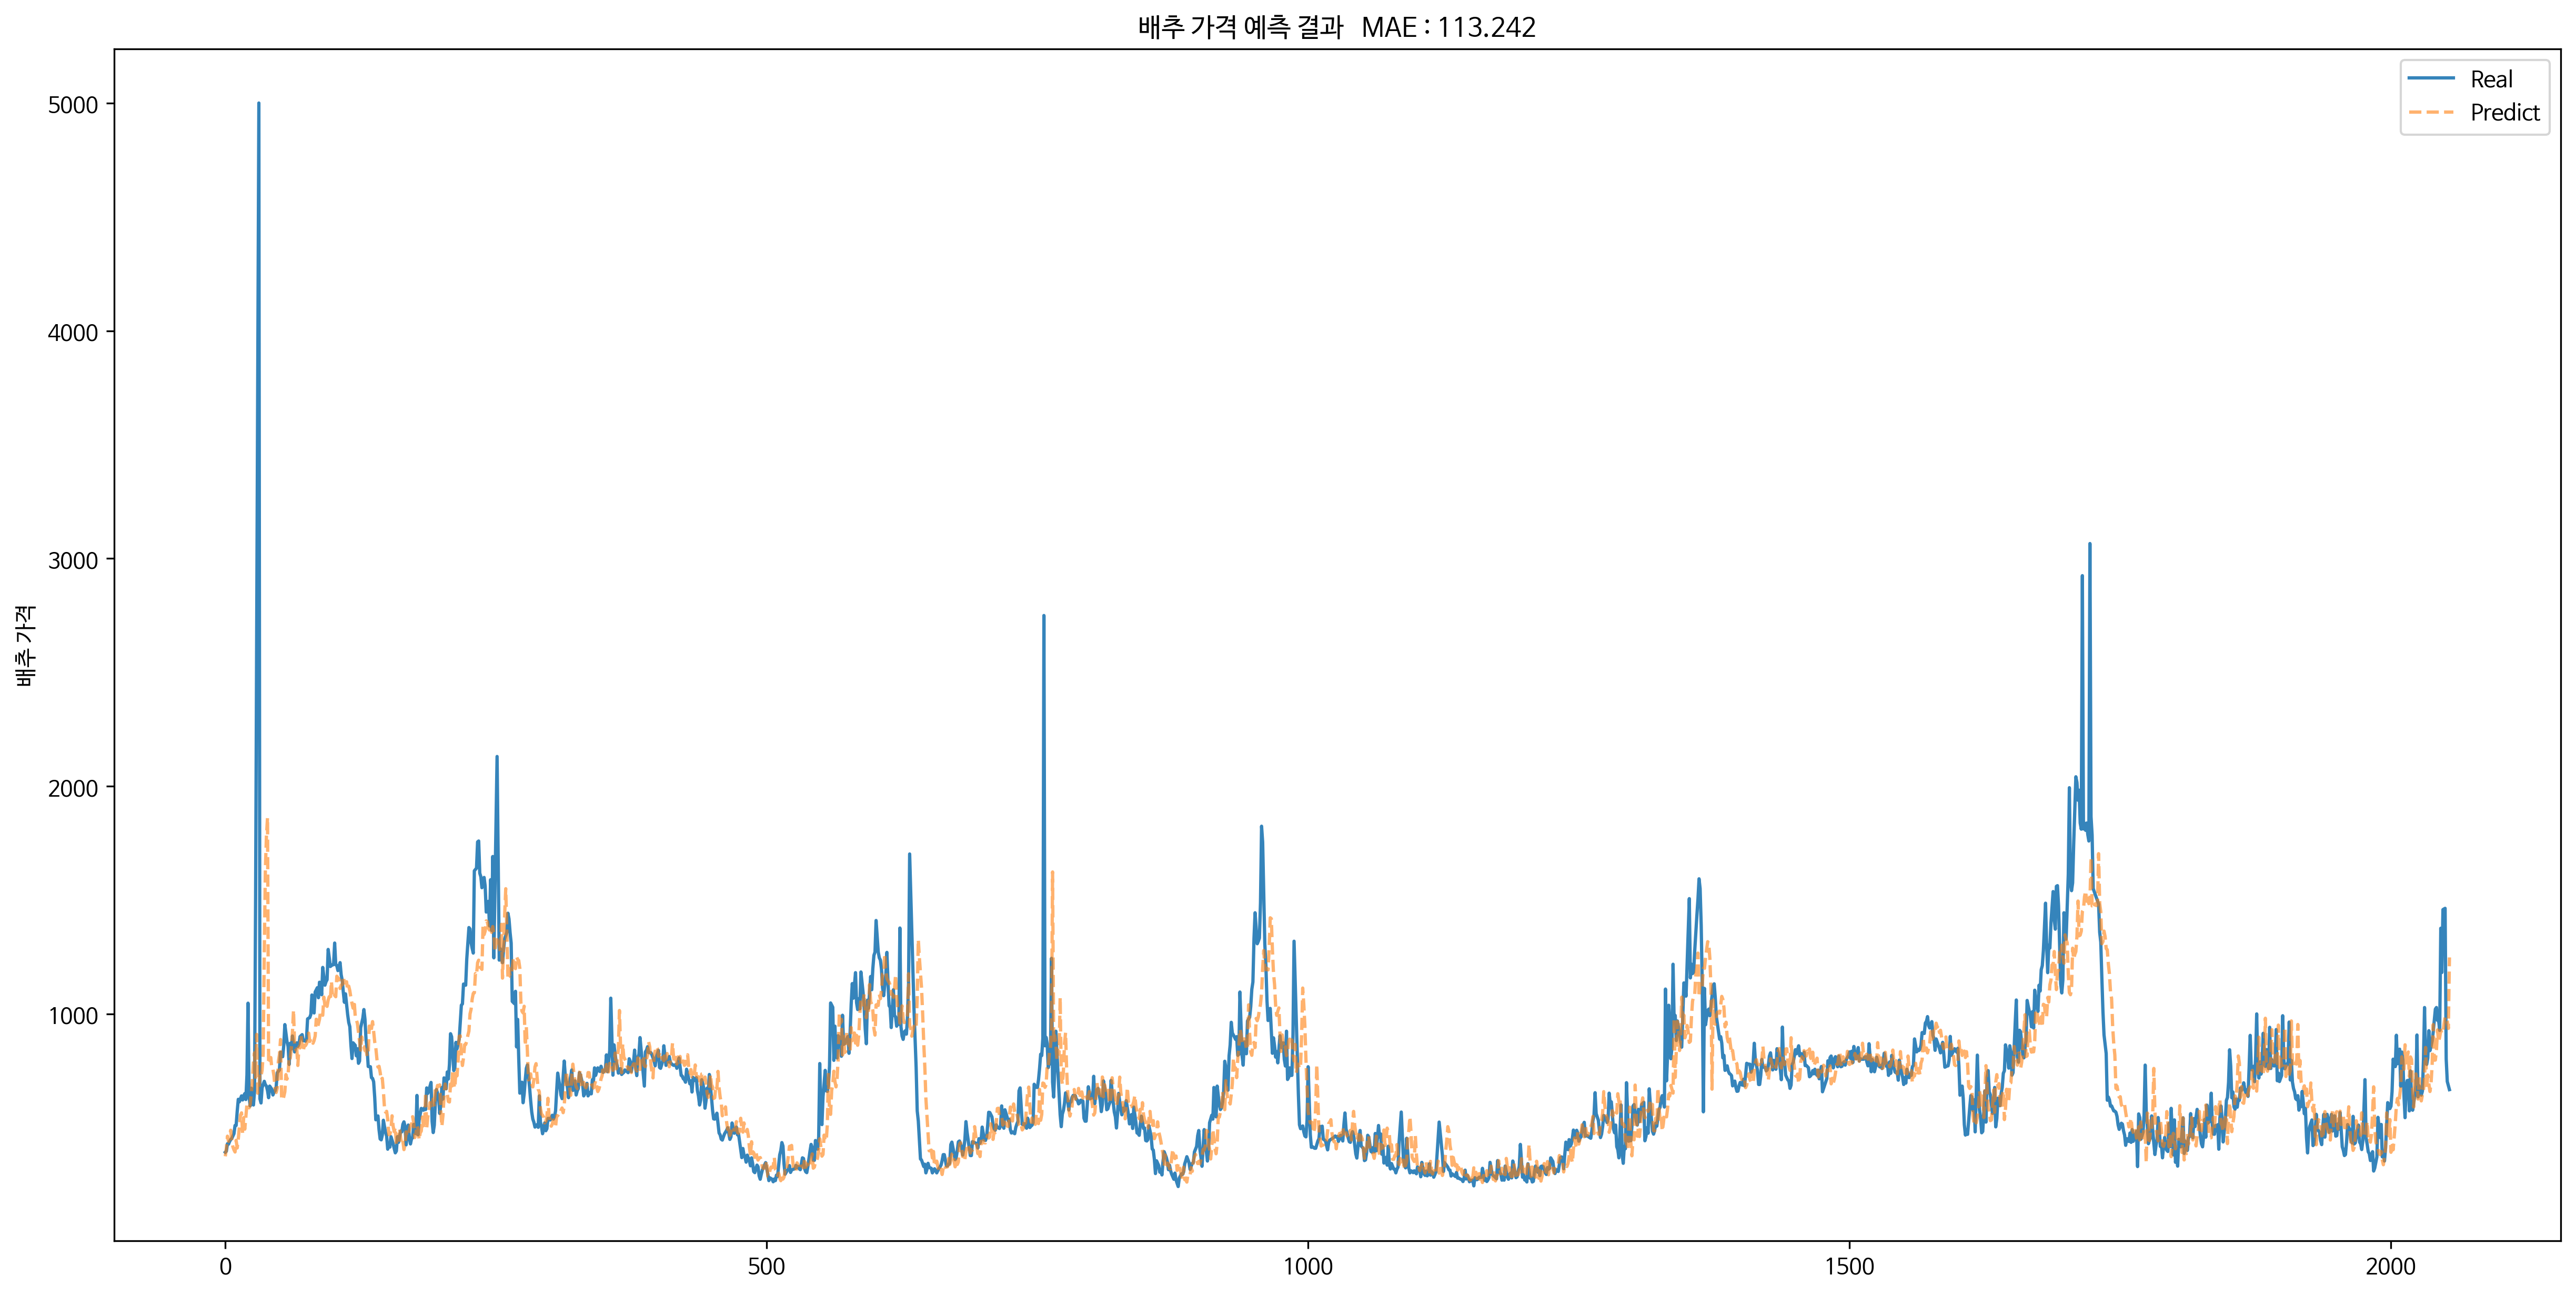

In [33]:
my_nong1.get_plot()

In [ ]:
weeks = [1,2,4]
features = ['배추', '무', '양파', '건고추', '마늘', '대파', '얼갈이배추', '양배추', '깻잎', '시금치', '미나리', '당근', '파프리카', '새송이', '팽이버섯', 
            '토마토', '청상추', '백다다기', '애호박', '캠벨얼리', '샤인마스캇']

week1=[]
week2=[]
week4=[]

for week in weeks:
  print(week)
  for feature in features:
    my_nong1 = Nong1(df1, df2)
    my_nong1.set_feature(feature)
    my_nong1.set_target(week)
    my_nong1.set_model()
    if week == 1:
      week1.append(my_nong1.get_price())
    if week == 2:
      week2.append(my_nong1.get_price())
    if week == 4:
      week4.append(my_nong1.get_price())
    print(feature)

1


In [ ]:
df1 = pd.concat([df1, df2], axis=0)
df1.to_csv('/content/gdrive/MyDrive/nongsan_data/df1.csv', encoding='utf-8-sig', index=False)

## 결과 제출

구글 드라이브의 nongsan_data 폴더에 sample_submission.csv 파일 업로드 후 실행 

In [ ]:
submission = pd.read_csv('/content/gdrive/MyDrive/nongsan_data/sample_submission.csv', encoding='utf-8')
feature = ['배추_가격(원/kg)',	'무_가격(원/kg)',	'양파_가격(원/kg)',	'건고추_가격(원/kg)',	'마늘_가격(원/kg)',	'대파_가격(원/kg)',	'얼갈이배추_가격(원/kg)',
           '양배추_가격(원/kg)'	,'깻잎_가격(원/kg)',	'시금치_가격(원/kg)',	'미나리_가격(원/kg)',	'당근_가격(원/kg)',	'파프리카_가격(원/kg)',	'새송이_가격(원/kg)',	'팽이버섯_가격(원/kg)',	
           '토마토_가격(원/kg)',	'청상추_가격(원/kg)',	'백다다기_가격(원/kg)',	'애호박_가격(원/kg)',	'캠벨얼리_가격(원/kg)',	'샤인마스캇_가격(원/kg)']
submission = submission.set_index('예측대상일자')
submission.loc[datetime.strptime(date, "%Y%m%d").strftime("%Y-%m-%d")+'+1week', feature] = week1
submission.loc[datetime.strptime(date, "%Y%m%d").strftime("%Y-%m-%d")+'+2week', feature] = week2
submission.loc[datetime.strptime(date, "%Y%m%d").strftime("%Y-%m-%d")+'+4week', feature] = week4
submission.reset_index(drop=False, inplace=True)
path = '/content/gdrive/MyDrive/nongsan_data/'
title = 'submission' + date + '.csv'

In [ ]:
submission.to_csv(path+title, encoding='utf-8-sig', index=False)